# Contents <a id='back'></a>

* [Introduction](#intro)
* [Step 1. Download data and prepare it for analysis](#data_review)
    * [Create library](#data_review_library)
    * [Load the data](#data_review_load)
* [Step 2. Explorative Data Analysis (EDA)](#data_preprocessing)
* [Step 3. Build a Model to Predict User Churn](#churn)
* [Step 4. Create a User Cluster](#creat_cluster)
* [Step 5. Formulate Simple Conclusions and Recommendations for Working with Customers](#conclution)
* [Findings](#end)

# Project Introduction

Every time we do an analysis, we need to formulate several testing and test analyzes that we need to test further. Sometimes, the tests we do lead us to accept the hypothesis, other times we also need to reject it. To make the right decisions in business, we must understand whether the assumptions we make are correct or not.

In this project as an analyst we analyze the profiles of these customers and develop customer retention strategies (customer retention).

## Purpose:
1. Learn how to predict the churn probability (for the next month) for each customer
2. Make user segmentation by selecting the most dominant group and describing its main features
3. Analyze the factors that most influence churn
4. Draw basic conclusions and provide recommendations on how to improve customer service


## Steps
As for the data that we will retrieve and analyze stored in a file `/datasets/gym_churn_us.csv`.
There are several steps of the `project 1` analysis this time, namely:
1. Download data and prepare it for analysis
2. Perform Explorative Data Analysis (EDA)
3. Building a Model to Predict Customer Churn
4. Create a User Cluster
5. Formulating Simple Conclusions and Recommendations for Working with Customers

[Back to Contents](#back)

# Step 1. Download data and prepare it for analysis

## Create library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import accuracy_score, precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.precision', 15)
pd.set_option('display.max_columns', 300)

In [2]:
def feat_hist (x, group_col, key_cols):
    x_new = x.copy ()
    x_new[key_cols] = data [key_cols]
    for c in key_cols:
        for cl in x[group_col].unique():
            sns.distplot(x_new[x_new [group_col]==cl][c],
                         label='{} = {}'.format(group_col, str(cl)), bins = 10)
        plt.title(c)
        plt.legend()
        plt.show()

## Load the data

In [3]:
data = pd.read_csv('/datasets/gym_churn_us.csv')
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470422861144,5.0,3,0.020397947620858,0.000000000000000,0
1,0,1,0,0,1,12,1,31,113.202937651058207,12.0,7,1.922936055041820,1.910243521519641,0
2,0,1,1,0,1,1,0,28,129.448479332006144,1.0,2,1.859098347383238,1.736501891634414,0
3,0,1,1,1,1,12,1,33,62.669863191238292,12.0,2,3.205632768238500,3.357214513052662,0
4,1,1,1,1,1,1,0,26,198.362265439036833,1.0,3,1.113884400425780,1.120078107422207,0


In [4]:
data.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

In [5]:
data.shape

(4000, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

All the data displayed looks very good, the number of columns is correct (14 columns including Churn), column data types (integer and float) and there are no missing values ​​which means there are no features or missing columns.

# Step 2. Explorative Data Analysis (EDA)

In [7]:
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000000000000,4000.000000000000000,4000.00000000000000,4000.000000000000000,4000.000000000000000,4000.00000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000
mean,0.510250000000000,0.845250000000000,0.48675000000000,0.308500000000000,0.903500000000000,4.68125000000000,0.412250000000000,29.184249999999999,146.943727809250021,4.322750000000000,3.724750000000000,1.879019712534937,1.767051822040508,0.265250000000000
std,0.499957425044087,0.361711412989101,0.49988689643489,0.461931916275352,0.295312634995689,4.54970585789327,0.492301256987942,3.258367102790006,96.355602395679838,4.191297434094276,3.749266820049219,0.972244872030617,1.052905717489531,0.441521429596796
min,0.000000000000000,0.000000000000000,0.00000000000000,0.000000000000000,0.000000000000000,1.00000000000000,0.000000000000000,18.000000000000000,0.148204788456624,1.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000
25%,0.000000000000000,1.000000000000000,0.00000000000000,0.000000000000000,1.000000000000000,1.00000000000000,0.000000000000000,27.000000000000000,68.868829978416670,1.000000000000000,1.000000000000000,1.180875086219582,0.963002948193214,0.000000000000000
50%,1.000000000000000,1.000000000000000,0.00000000000000,0.000000000000000,1.000000000000000,1.00000000000000,0.000000000000000,29.000000000000000,136.220158971036881,1.000000000000000,3.000000000000000,1.832768412113406,1.719574310109868,0.000000000000000
75%,1.000000000000000,1.000000000000000,1.00000000000000,1.000000000000000,1.000000000000000,6.00000000000000,1.000000000000000,31.000000000000000,210.949624655502134,6.000000000000000,5.000000000000000,2.536078338329289,2.510336265936281,1.000000000000000
max,1.000000000000000,1.000000000000000,1.00000000000000,1.000000000000000,1.000000000000000,12.00000000000000,1.000000000000000,41.000000000000000,552.590740386879816,12.000000000000000,31.000000000000000,6.023668475995910,6.146782880452392,1.000000000000000


There is a large difference in scale in the `Avg_additional_charges_total` column where the other columns have a standard deviation value below 10. which will affect when clustering the results will not be good, so standardization measures are needed.

In [8]:
data.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037427696495,0.873086083701939,0.534195304525349,0.353521605988431,0.903708744470908,5.747192922762845,0.464103436543042,29.976522626743790,158.445714801611899,5.283089486219803,4.711806736985369,2.024875642518554,2.027881733095179
1,0.510838831291235,0.768143261074458,0.355325164938737,0.183788878416588,0.902921771913289,1.728557964184731,0.268614514608860,26.989632422243165,115.082898619287263,1.662582469368520,0.990574929311970,1.474994662372977,1.044545593398017


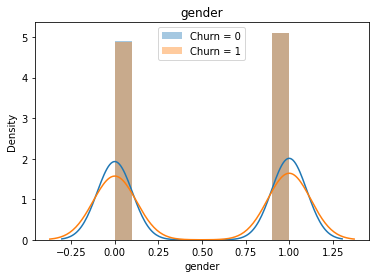

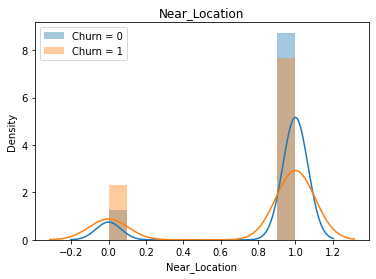

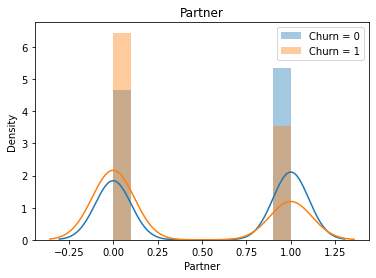

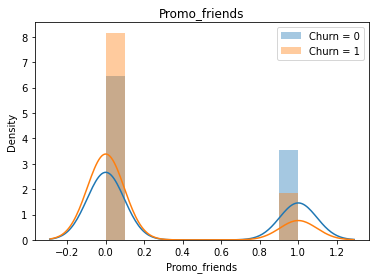

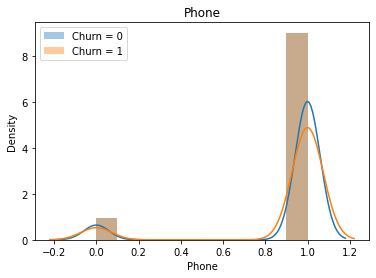

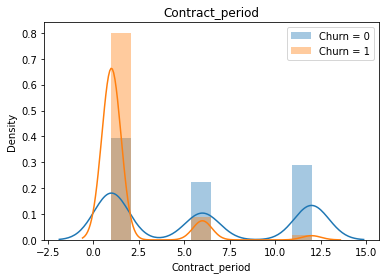

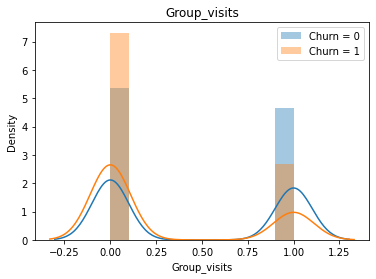

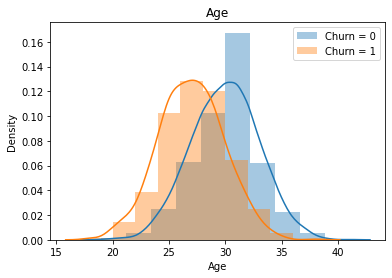

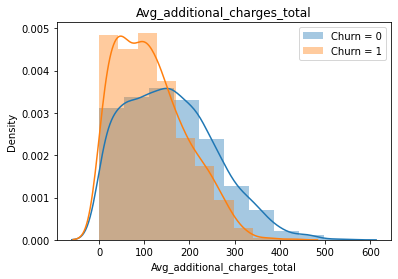

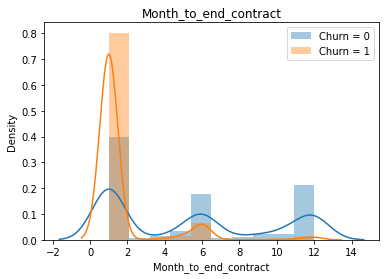

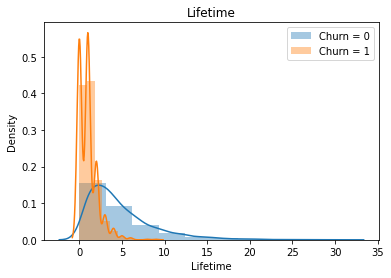

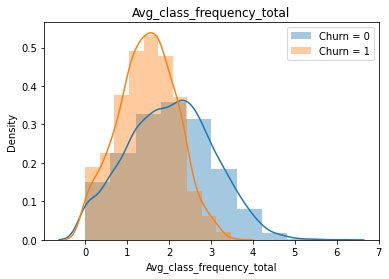

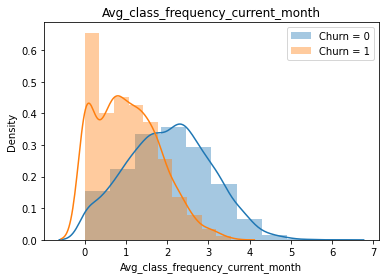

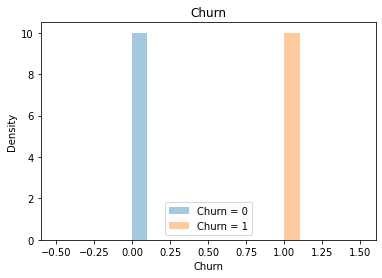

In [9]:
feat_hist(data, 'Churn', data.columns)

0 = Not Churned
1 = Churn,

If you look at it from `gender`: it can be seen that the gender between male and female is quite balanced.

`near_location`: you can see that those who churn 0 are far more in the nearest location, but for those who churn 1, there are more locations that are not close to the gym. in other words people tend to come to the gym more often if the location is near.

`Partner`: it can be seen, if there is a partner for the gym (churn 1) compared to no partner (churn 0) it turns out that more people tend to go alone, it could be because they will be much more focused on exercising.

In [10]:
data.corr()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000000000000,0.006699227595081,-0.010462622250800,-0.005033272441054,-0.008542118064000,0.000502261220279,0.017878940218984,0.013806900920360,-0.009334436022097,-0.001280790522073,0.013578571154470,0.014620159193698,0.009156488375539,0.000707733985153
Near_Location,0.006699227595081,1.000000000000000,-0.005119431260763,0.210964279250089,-0.015763230257229,0.150232831416567,0.154728047973810,0.058357839446367,0.040761205686103,0.143960652863483,0.070920564055164,0.043127478605891,0.062663633458793,-0.128097990299810
Partner,-0.010462622250800,-0.005119431260763,1.000000000000000,0.451959803638693,0.009969610205313,0.306166251238889,0.022709566916954,0.047479698759628,0.022941185300935,0.294632124877685,0.061229353260985,0.024937869800103,0.045561091361999,-0.157985736985098
Promo_friends,-0.005033272441054,0.210964279250089,0.451959803638693,1.000000000000000,0.001981592231935,0.244551568070672,0.120169506269850,0.050113307413902,0.036897676000240,0.239553224750288,0.072721100932983,0.028063220773726,0.053768377063076,-0.162233077833515
Phone,-0.008542118064000,-0.015763230257229,0.009969610205313,0.001981592231935,1.000000000000000,-0.006893264000346,-0.010099146860770,-0.011403238953259,0.009279431489794,-0.011196256833938,-0.018801227382775,0.008340465501805,0.013374852916164,-0.001176601362480
Contract_period,0.000502261220279,0.150232831416567,0.306166251238889,0.244551568070672,-0.006893264000346,1.000000000000000,0.169990834019106,0.138249289429536,0.111445063341492,0.973063587268638,0.170725270972972,0.096211136398092,0.159407376566591,-0.389984211586078
Group_visits,0.017878940218984,0.154728047973810,0.022709566916954,0.120169506269850,-0.010099146860770,0.169990834019106,1.000000000000000,0.080933568901738,0.032079086460016,0.163702563158596,0.075852846038239,0.056694752430919,0.075923274727096,-0.175324655498149
Age,0.013806900920360,0.058357839446367,0.047479698759628,0.050113307413902,-0.011403238953259,0.138249289429536,0.080933568901738,1.000000000000000,0.080240125272997,0.134511341398497,0.164692820019427,0.119953132113990,0.183094542154536,-0.404735252823589
Avg_additional_charges_total,-0.009334436022097,0.040761205686103,0.022941185300935,0.036897676000240,0.009279431489794,0.111445063341492,0.032079086460016,0.080240125272997,1.000000000000000,0.113958039016871,0.079028338696600,0.044426412947373,0.079569677409450,-0.198697451068203
Month_to_end_contract,-0.001280790522073,0.143960652863483,0.294632124877685,0.239553224750288,-0.011196256833938,0.973063587268638,0.163702563158596,0.134511341398497,0.113958039016871,1.000000000000000,0.161077551415275,0.085386674018559,0.147605112323244,-0.381392983695714


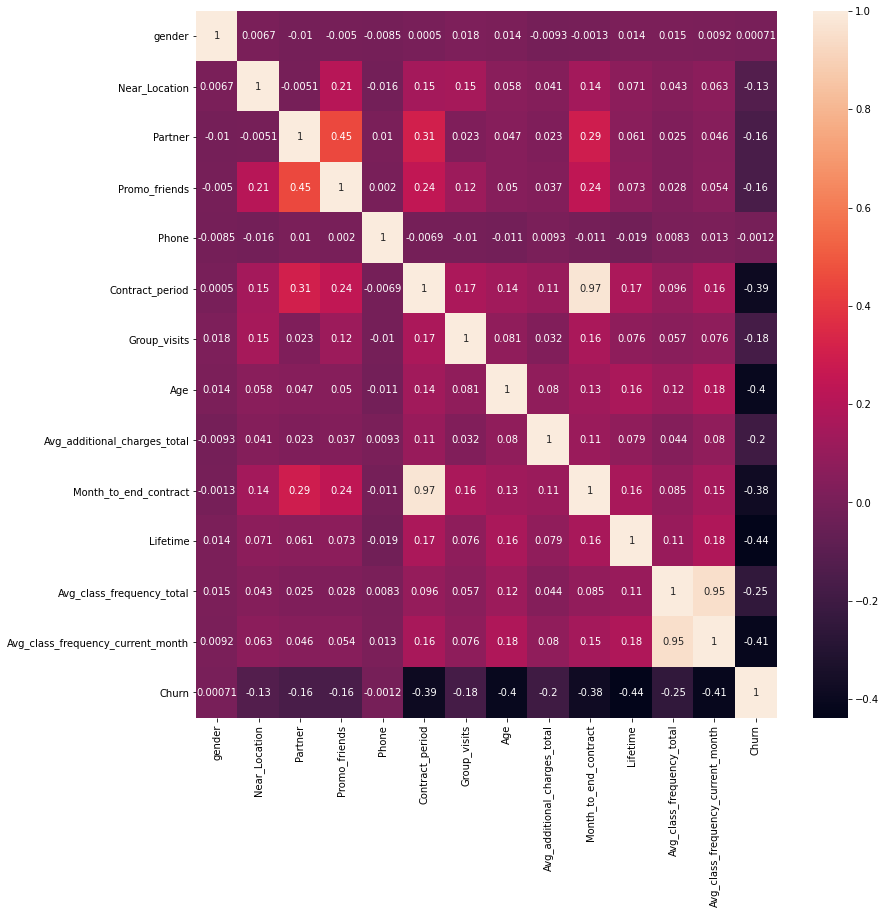

In [11]:
plt.figure(figsize= (13, 13))
sns.heatmap(data.corr(), annot = True)
plt.show()

The heatmap shows that if the value is more positive and close to 1 means the correlation is large. But if the correlation value is minus, it means highly correlated but in the other direction. If one variable increases, the other will decrease, and vice versa. it means that we don't need to observe between tables with small correlation values. Which if for example we want to make a predictive model it means looking for one with a large correlation value.

# Step 3. Build a Model to Predict User Churn

Divide the data into train sets and validation sets

In [12]:
X_train, X_val, y_train, y_val = train_test_split(data.drop(columns = ['Churn']), data['Churn'], test_size = 0.2, random_state=42)

Logistic Regression model:

In [13]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_train)

print('Score Accuracy for logistic regression is: {:.2f}'.format(accuracy_score(y_train, y_pred_lr)))
print('Score Precision for logistic regression is: {:.2f}'.format(precision_score(y_train, y_pred_lr)))
print('Score Recall for logistic regression is: {:.2f}'.format(recall_score(y_train, y_pred_lr)))

Score Accuracy for logistic regression is: 0.93
Score Precision for logistic regression is: 0.90
Score Recall for logistic regression is: 0.83


In [14]:
lr_model = LogisticRegression(random_state=42)

lr_model.fit(X_train, y_train)

y_proba_lr = lr_model.predict_proba(X_val)
y_pred_lr = lr_model.predict(X_val)

print('Score Accuracy for logistic regression is: {:.2f}'.format(accuracy_score(y_val, y_pred_lr)))
print('Score Precision for logistic regression is: {:.2f}'.format(precision_score(y_val, y_pred_lr)))
print('Score Recall for logistic regression is: {:.2f}'.format(recall_score(y_val, y_pred_lr)))

Score Accuracy for logistic regression is: 0.91
Score Precision for logistic regression is: 0.86
Score Recall for logistic regression is: 0.77


Random forest model:

In [15]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_train)

print('Score Accuracy for random forest is: {:.2f}'.format(accuracy_score(y_train, y_pred_rf)))
print('Score Precision for random forest is: {:.2f}'.format(precision_score(y_train, y_pred_rf)))
print('Score Recall for random forest is: {:.2f}'.format(recall_score(y_train, y_pred_rf)))

Score Accuracy for random forest is: 1.00
Score Precision for random forest is: 1.00
Score Recall for random forest is: 1.00


In [16]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_proba_rf = rf_model.predict_proba(X_val)
y_pred_rf = rf_model.predict(X_val)

print('Score Accuracy for random forest is: {:.2f}'.format(accuracy_score(y_val, y_pred_rf)))
print('Score Precision for random forest is: {:.2f}'.format(precision_score(y_val, y_pred_rf)))
print('Score Recall for random forest is: {:.2f}'.format(recall_score(y_val, y_pred_rf)))

Score Accuracy for random forest is: 0.91
Score Precision for random forest is: 0.85
Score Recall for random forest is: 0.78


- We indicate the 'random_state' parameter when splitting data and defining the algorithm = 42.
- We have evaluated the accuracy, precision, and recall for both models by using the validation data.
- Both model show:
    1. LR model shows that the Accuracy value on train dataset is 0.93, but the result of the Accuracy on test dataset is 0.91 (which the difference is 0.02).
    2. RF model shows that the Accuracy value on train dataset is 1.00, but the result of the Accuracy on test dataset is 0.91 (which is a huge difference 0.09)

If we compare the two models, both LR and RF both experience overitting, where the test accuracy results are smaller than the train accuracy results. However, the LR model is considered to be better than the poor RF model.

# Step 4. Create a User Cluster

In [17]:
sc = StandardScaler()
x_sc = sc.fit_transform(data.drop(columns = ['Churn']))

In [18]:
linked = linkage(x_sc, method = 'ward')

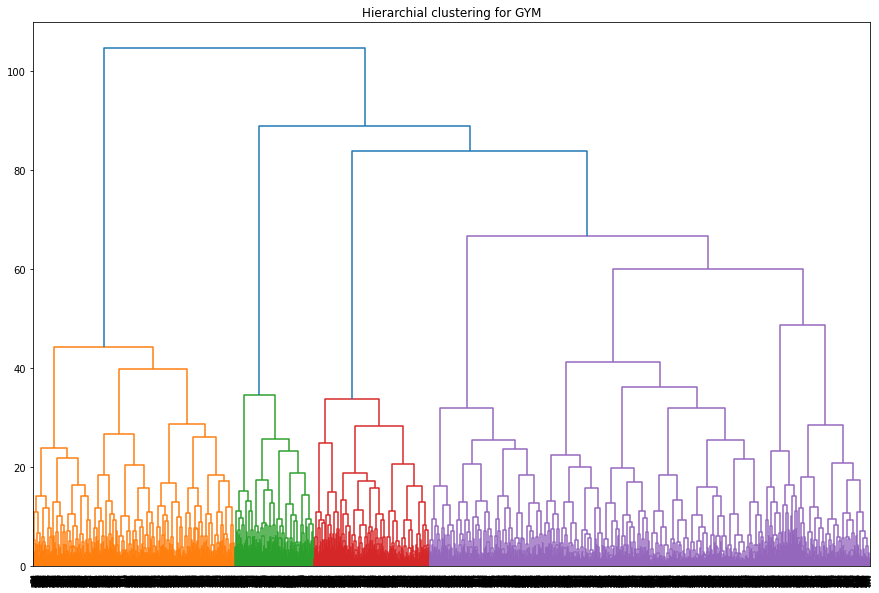

In [19]:
plt.figure(figsize=(15, 10))
dendrogram(linked,
            orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show()

From this dendrogram it can be concluded, there are 4000 points of data. This dendrogram makes it easy for us to see how many clusters can be produced optimally. Where the largest clusters are shown in purple, and the smallest clusters in green clusters.

In [20]:
km = KMeans(n_clusters = 5)
labels = km.fit_predict(data.drop(columns = ['Churn']))

In [21]:
data['cluster_km'] = labels

In [22]:
data.groupby(['cluster_km']).count()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,1029,1029,1029,1029,1029,1029,1029,1029,1029,1029,1029,1029,1029,1029
1,706,706,706,706,706,706,706,706,706,706,706,706,706,706
2,1032,1032,1032,1032,1032,1032,1032,1032,1032,1032,1032,1032,1032,1032
3,271,271,271,271,271,271,271,271,271,271,271,271,271,271
4,962,962,962,962,962,962,962,962,962,962,962,962,962,962


In [23]:
data.groupby(['cluster_km']).sum()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,529,864,465,288,924,4426,419,29814,109004.855450791757903,4112.0,3647,1906.288534569899412,1757.803490347468141,344
1,368,622,361,245,634,3813,306,20717,177195.245311930659227,3531.0,2944,1343.857034042793430,1301.338252663641924,126
2,525,851,504,303,937,4333,400,29834,36739.945103929218021,3979.0,3503,1895.531070383711494,1746.805329722023089,361
3,127,232,140,90,251,1578,117,8088,96606.611189195973566,1459.0,1198,547.219401855915976,544.542510836931342,12
4,492,812,477,308,868,4575,407,28284,168228.254181151976809,4210.0,3607,1823.182809287429791,1717.717704591970232,218


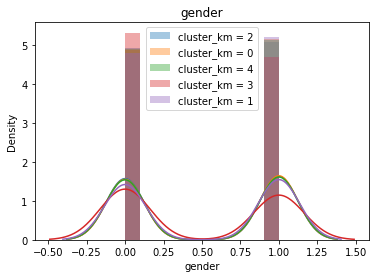

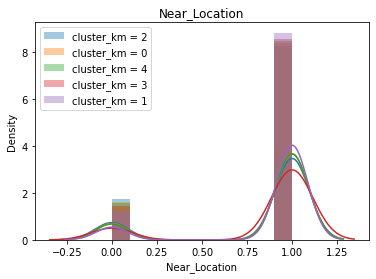

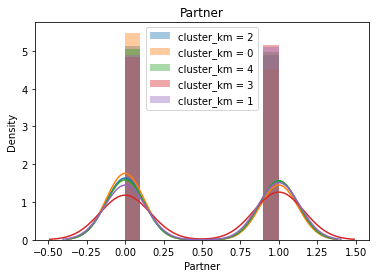

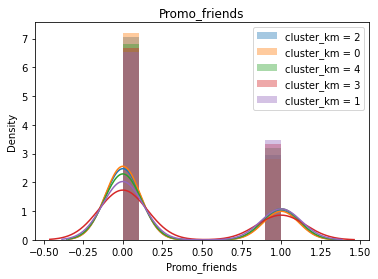

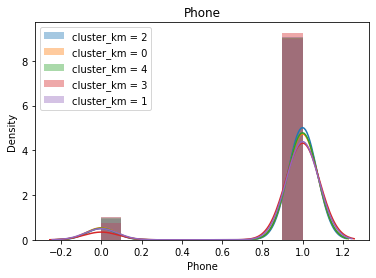

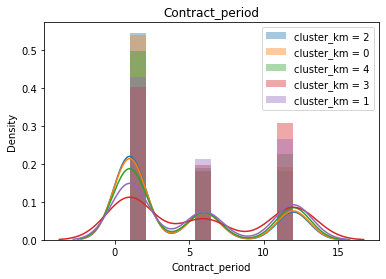

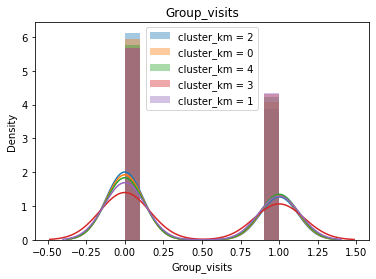

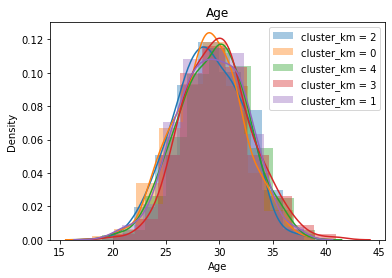

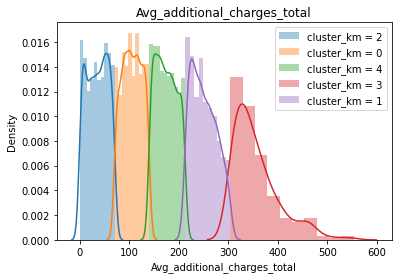

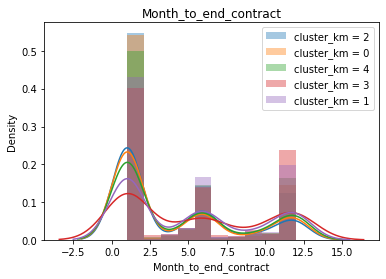

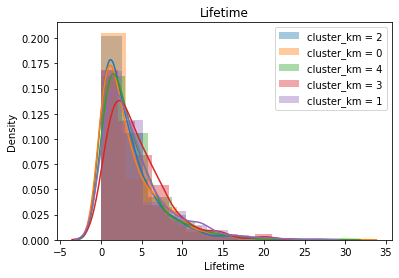

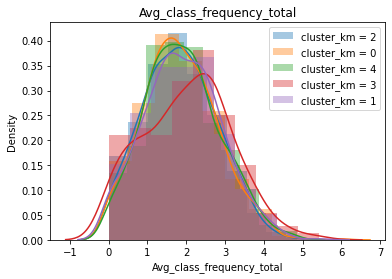

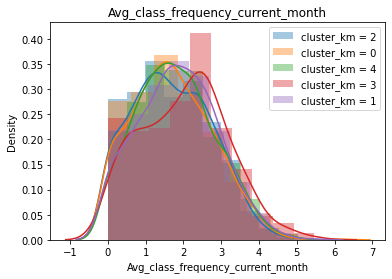

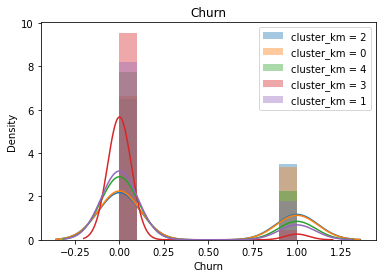

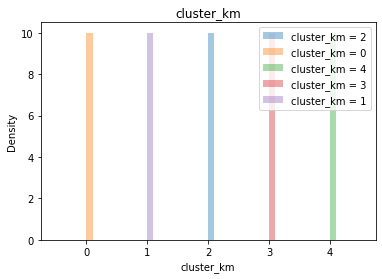

In [24]:
feat_hist(data, 'cluster_km', data.columns)

Taken from a significant one, namely `contact_period` where cluster 3 has low contact_period = 0, cluster 1 also shows results below 5, and for cluster 2 the contact_period is quite a lot, namely above 5.

`avg_additional_charges_total` it turns out that cluster 2 has the most additional_charges. Which cluster group is this, the purchase pattern besides membership, it is possible that there are other purchases such as drinks, protein milk or even food at the gym. So that the cluster 2 group can get more promos when compared to cluster 1.

In [25]:
data.groupby(['cluster_km']).mean()['Churn']

cluster_km
0    0.334305150631681
1    0.178470254957507
2    0.349806201550388
3    0.044280442804428
4    0.226611226611227
Name: Churn, dtype: float64

The higher the cluster the more it shows it is churn. And the results show that cluster 2 has the lowest churn.

# Step 5. Formulate Simple Conclusions and Recommendations for Working with Customers

Recommendation:

We could predict that the probability of churn for each customer is with the lowest month_to_end_contract left (1 month). It is the factor that impact churn most. To reduce this probability happen, we could offer them vouchers/discounts for membership then they might still stay for the upcoming month.